In [1]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [2]:
import pandas as pd
wp = pd.read_csv('../weighted_phonemes.csv')
wp.drop('Unnamed: 0', inplace=True, axis=1)
wp

,VERSE1,VERSE2,PROSODY,PROSODY_ID,VERSE1_phoneme,VERSE2_phoneme,PROSODY_phoneme
0,‏ آتش آهم ز بس گلزار بی نم می شود,برگ گل سنگ ته دندان شبنم می شود,فاعلاتن فاعلاتن فاعلاتن فاعلن,12,‏ ātaš āham ze bas golzār bi nam mišavad,barg gol sang tah dandān šabnam mišavad,fā`elānt fā`elānt fā`elānt fā`elan
1,‏ بهیچوجه نیارم برید ازو که مرا,به دل محبت او چون صفاست با گوهر,مفاعلن فعلاتن مفاعلن فعلن,92,‏ bahyxube nayāram barid ozav ke marā,be del mohbat u čon sefāsat bā gohar,mafā`elen fal`ānt mafā`elen fe`lan
2,‏ بی تکلف ز شکر ریزی صائب جویا,طوطی نطق تو طرز سخن آموخته است,فعلاتن فعلاتن فعلاتن فعلن,45,‏ bi taklef ze šekar rizi sā`eb juyā,tuti notq to tarz soxan āmustened,fal`ānt fal`ānt fal`ānt fe`lan
3,‏ چنان کز شهد و شکر نقل نوشین می‌شود پیدا,چو لب بر لب گذاری جان شیرین می‌شود پیدا,مفاعیلن مفاعیلن مفاعیلن مفاعیلن,114,‏ čenān kez šahd va šekar naql nušin mišavad p...,čo lab bar lab gozāri jān širin mišavad peydā,mafā`eliyān mafā`eliyān mafā`eliyān mafā`eliyān
4,‏ خواهم که خدا روی به دولت بگشاید,زین درگه امید عرب را و عجم را,مفعول مفاعیل مفاعیل فعولن,163,‏ xāhomeko xodā ravi be dolat begošāyad,yzn dargah omid arab rā va ajam rā,maf`ul mafā`e`il mafā`e`il fe`olan
...,...,...,...,...,...,...,...
1339684,ییشش بخوانده ‌غاصب کالیسی‌‌,مستد برانه آیت ولّو را‌,مفعول فاعلات مفاعیلن,143,yeš`ege bexānde qa`asb kālisi,mostad berāne āyat velv rā`,maf`ul fā`elāt mafā`eliyān
1339685,ییش‌هر تختی یکی خوان ظریف,وندر آن گسترده دیبایی لطیف,فاعلاتن فاعلاتن فاعلن,16,ye^lang taxti ye^ki xān zarif,venedr ān gostarde dibā`i latif,fā`elānt fā`elānt fā`elan
1339686,ییشوایان بهر فردا گرم شور,هریکی گوبا به دیگرگونه طور,فاعلاتن فاعلاتن فاعلن,16,yejviyān ba^hre fardā garm šur,haryeki govā be digargune tor,fā`elānt fā`elānt fā`elan
1339687,ییک باره‌ای برنشسته سمند,بفتراک بربسته دارد کمند,فعولن فعولن فعولن فعل,54,yezak hāre`e barnešaste samand,beftārt barbaste dārad kamand,fe`olan fe`olan fe`olan fe`l


# **Balance Sample**  
2000 records  from each 55 popular prosodies.

In [3]:
id_counts = wp.groupby('PROSODY_ID').size()
filtered_ids = id_counts[id_counts >= 100]
result = wp[wp['PROSODY_ID'].isin(filtered_ids.index)]

def select_random_rows(group):
    n = min(500, len(group))
    return group.sample(n=n)
bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)
numberclass = len(set(bsmp["PROSODY_ID"]))
numberclass

C:\Users\Turbo\AppData\Local\Temp\ipykernel_4484\36628110.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)


55

shuffling

In [4]:
from random import shuffle

row_indices = bsmp.index.tolist()
shuffle(row_indices)
bsmp = bsmp.iloc[row_indices]
bsmp = bsmp.reset_index(drop=True)
bsmp

,VERSE1,VERSE2,PROSODY,PROSODY_ID,VERSE1_phoneme,VERSE2_phoneme,PROSODY_phoneme
0,سروی ز بستان ارم، شمع شبستان حرم,رویش گلستان عجم کویش دلستان دیده‌ام,مستفعلن مستفعلن مستفعلن مستفعلن,83,soruy ze besetān aram ، šam` šabestān haram,ruyeš golestān ajam keyoš dolsāne dideam,mosta`felan mosta`felan mosta`felan mosta`felan
1,پس فضل فاضلان نه به اعراض است,ای مرد، نه مگر به قد و بالا,مفعول فاعلات مفاعیلن,143,pas fazl fāzelān noh be e`rāz ast,ey mard ، noh magar be qad va bālā,maf`ul fā`elāt mafā`eliyān
2,اندر شبان تاریک جیحون دو چیز خواهد,هم روی ماهتابی هم ماهتاب روئی,مفعول فاعلاتن مفعول فاعلاتن,147,andar šobān tārik jeyhun do čiz,ham ravi māhtābi ham māhtāb ru`i,maf`ul fā`elānt maf`ul fā`elānt
3,در سماع عشق، محفل گرم بود,چون سپند از جای جستم یللی,مستفعلتن مستفعلتن,70,dar samā` ešq ، mahfel garm bud,čon sepand az jāy jostam ylyli,mostaf`altan mostaf`altan
4,سالارشان را نیکو بودکار,احرار را نیز دل باد بیدار,مستفعلن فع مستفعلن فع,72,sālāršān rā niku budkār,ahrār rā niz del bād bidār,mosta`felan fa` mosta`felan fa`
...,...,...,...,...,...,...,...
21467,ره پر شکن است پر بیفکن,تیغ است قوی سپر بیفکن,مفعول مفاعلن فعولن,154,rah por šekan ast por biyāfkan,tiq ast qavi separ biyāfkan,maf`ul mafā`elen fe`olan
21468,کنون از شکوفه‌ام شک افتاده در ضمیر,که گر شیرخواره‌است به صورت چراست پیر,فعولن مفاعلن فعولن مفاعلن,59,konun az šokufate šak oftāde dar zamir,kahger širxārestād be surat čarāsat pir,fe`olan mafā`elen fe`olan mafā`elen
21469,گوئی که رسی به مرگ از هجرم,هجر تو ز مرگ وا نمیمٰاند,مفعول مفاعلن مفاعیلن,156,go`i ke rasi be marg az hejrm,hejr to ze marg vā nemimānad,maf`ul mafā`elen mafā`eliyān
21470,چو پیچد به نسرین او شاخ سنبل,ز مرآت، مرئی شود نقش جوهر,فعولن فعولن فعولن فعولن,55,čo pičad be nasrin u šāx sonbol,ze mar`āt ، marā`i šavad naqš johar,fe`olan fe`olan fe`olan fe`olan


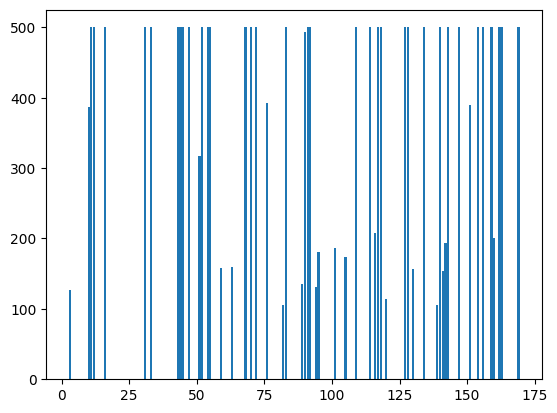

21472

In [5]:
import matplotlib.pyplot as plt

id_counts = bsmp['PROSODY_ID'].value_counts()
id_counts_sorted = id_counts.sort_index()

plt.bar(id_counts_sorted.index, id_counts_sorted)
plt.show()
records = len(bsmp)
records

#Model

In [6]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchtext import vocab as Vocab
import collections
from torch.nn.utils.rnn import pad_sequence
from transformers import AutoTokenizer


class processed_dataset(Dataset):
    def __init__(self, data, vocab):
        self.tokenized_data = [[vocab.stoi[word.lower()] for word in self.tokenize_sent(data_tuple[0])] for data_tuple in data]
        self.labels = [data_tuple[1] for data_tuple in data]
        assert len(self.labels) == len(self.tokenized_data)

    def tokenize_sent(self, sent):
        return [word for word in sent.split(' ')]



    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.tokenized_data[idx], self.labels[idx]


class processed_dataset_bert(Dataset):
    def __init__(self, data, bert_type):
        tokenizer = AutoTokenizer.from_pretrained(bert_type)
        self.texts = []
        self.labels = []
        for text, label in data:
            self.texts.append(torch.tensor(tokenizer.encode(text, max_length=128, truncation=True)))
            self.labels.append(label)
        assert len(self.texts) == len(self.labels)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]


class packDataset_util():
    def __init__(self, vocab_target_set):
        self.vocab = self.get_vocab(vocab_target_set)

    def fn(self, data):
        labels = torch.tensor([item[1] for item in data])
        lengths = [len(item[0]) for item in data]
        texts = [torch.tensor(item[0]) for item in data]
        padded_texts = pad_sequence(texts, batch_first=True, padding_value=0)

        return padded_texts, lengths, labels

    def get_loader(self, data, shuffle=True, batch_size=32):
        dataset = processed_dataset(data, self.vocab)
        loader = DataLoader(dataset=dataset, shuffle=shuffle, batch_size=batch_size, collate_fn=self.fn)
        return loader

    def tokenize_sent(self, sent):
        return [word for word in sent.split(' ')]


    def get_vocab(self, target_set):
        tokenized_data = [[word.lower() for word in self.tokenize_sent(data_tuple[0])] for data_tuple in target_set]
        counter = collections.Counter([word for review in tokenized_data for word in review])
        vocab = Vocab.Vocab(counter, min_freq=3)
        return vocab


class packDataset_util_bert():
    def __init__(self, bert_type):
        self.bert_type = bert_type

    def fn(self, data):
        texts = []
        labels = []
        for text, label in data:
            texts.append(text)
            labels.append(label)
        labels = torch.tensor(labels)
        padded_texts = pad_sequence(texts, batch_first=True, padding_value=0)
        attention_masks = torch.zeros_like(padded_texts).masked_fill(padded_texts != 0, 1)
        return padded_texts, attention_masks, labels


    def get_loader(self, data, shuffle=True, batch_size=32):
        dataset = processed_dataset_bert(data, self.bert_type)
        loader = DataLoader(dataset=dataset, shuffle=shuffle, batch_size=batch_size, collate_fn=self.fn)
        return loader

In [8]:
packDataset_util = packDataset_util_bert("bert-base-uncased")

In [9]:
import math
train=[]
for i in range(0, math.floor(records * 0.8)):
  train.append((bsmp["VERSE1_phoneme"][i], bsmp["PROSODY_ID"][i]))
  train.append((bsmp["VERSE2_phoneme"][i], bsmp["PROSODY_ID"][i]))
len(train)


34354

In [10]:
test=[]
for i in range(math.floor(records * 0.8), records):
  test.append((bsmp["VERSE1_phoneme"][i],bsmp["PROSODY_ID"][i]))
  test.append((bsmp["VERSE2_phoneme"][i],bsmp["PROSODY_ID"][i]))
len(test)

8590

In [11]:
train_loader = packDataset_util.get_loader(train, shuffle=False, batch_size=128)
test_loader = packDataset_util.get_loader(test, shuffle=False, batch_size=128)

In [12]:
import torch
import torch.nn as nn
import transformers
import os
from torch.nn.utils import clip_grad_norm_

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [14]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-base-parsbert-uncased"
                                                     , num_labels=176).to(device) # because we have 11 classes

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Optional
if you load a trained model

In [15]:
# Only if you want to resume your previous epochs
# model.load_state_dict(torch.load("your_checkpoint.pth"))

In [16]:
criterion = nn.CrossEntropyLoss()

In [17]:
BATCH_SIZE = 128
weight_decay = float(0)
lr = 1e-5
EPOCHS = 10
warm_up_epochs = 3

In [18]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

In [19]:
scheduler = transformers.get_linear_schedule_with_warmup(optimizer,
                                        num_warmup_steps=warm_up_epochs * len(train_loader),
                                        num_training_steps=(warm_up_epochs + EPOCHS) * len(train_loader))


In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import warnings
def evaluaion(loader):
    warnings.filterwarnings('ignore')
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for padded_text, attention_masks, labels in loader:
            padded_text = padded_text.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)
            output = model(padded_text, attention_masks)[0]  # batch_size, 2
            _, flag = torch.max(output, dim=1)

            # add true and predicted labels for calculating F1 score
            y_true += labels.cpu().numpy().tolist()
            y_pred += flag.cpu().numpy().tolist()

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        cm = confusion_matrix(y_true, y_pred)
        return acc, f1, precision, recall, cm

In [21]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3A20-2AB6

 Directory of C:\Users\Turbo\Desktop\persian_poem_prosody_research\RES\g2p_parsbert

03/18/2024  04:20 PM    <DIR>          .
03/18/2024  04:20 PM    <DIR>          ..
03/15/2024  07:06 PM    <DIR>          .ipynb_checkpoints
03/17/2024  04:25 PM           368,025 g2p_parsbert-1336930.html
03/17/2024  04:10 PM       651,991,049 g2p_parsbert-1336930.pth
03/18/2024  03:58 PM           364,450 g2p_parsbert-138520.html
03/18/2024  03:56 PM       651,990,844 g2p_parsbert-138520.pth
03/18/2024  02:57 PM           364,705 g2p_parsbert-243686.html
03/18/2024  02:41 PM       651,990,844 g2p_parsbert-243686.pth
03/18/2024  04:16 PM           363,312 g2p_parsbert-38293.html
03/18/2024  04:15 PM       651,990,639 g2p_parsbert-38293.pth
03/16/2024  02:26 AM           360,940 g2p_parsbert-5500.html
03/16/2024  02:26 AM       651,990,434 g2p_parsbert-5500.pth
03/18/2024  01:09 PM           365,381 g2p_parsbert-726511.html
03/18/2024

In [22]:
from timeit import default_timer as timer

last_train_avg_loss = 100000
epoch_times = []
for epoch in range(warm_up_epochs + EPOCHS): # you can change number of epochs
    start_time = timer()
    model.train()
    total_loss = 0
    for padded_text, attention_masks, labels in train_loader:
        padded_text = padded_text.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)
        output = model(padded_text, attention_masks)[0]
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    end_time = timer()

    avg_loss = total_loss / len(train_loader)
    print(f'finish training, avg loss: {avg_loss}/{last_train_avg_loss}, begin to evaluate:')
    test_acc, _, _, _, _ = evaluaion(test_loader)
    et = end_time - start_time
    epoch_times.append(et)
    print(f'test accuracy: {test_acc}, Epoch time = {et}')
    last_train_avg_loss = avg_loss
    print('*' * 89)

torch.save(model.state_dict(), f"g2p_parsbert-{records}.pth")
acc, f1, precision, recall, cm = evaluaion(test_loader)
train_acc, train_f1, train_precision, train_recall, train_cm = evaluaion(train_loader)
print('*' * 89)
print(f'train time = {sum(epoch_times)}')
print(f'finish all, final test accuracy: {acc}, F1 score: {f1}, Precision: {precision}, Recall: {recall}, Confusion Matrix: {cm}')
print(f'finish all, final train accuracy: {train_acc}, F1 score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}, Confusion Matrix: {train_cm}')

finish training, avg loss: 4.955842838854594/100000, begin to evaluate:
test accuracy: 0.026542491268917345, Epoch time = 36.32189359999029
*****************************************************************************************
finish training, avg loss: 4.303193256314359/4.955842838854594, begin to evaluate:
test accuracy: 0.04458672875436554, Epoch time = 35.23728100000881
*****************************************************************************************
finish training, avg loss: 3.7402093206639626/4.303193256314359, begin to evaluate:
test accuracy: 0.06670547147846333, Epoch time = 35.66925400000764
*****************************************************************************************
finish training, avg loss: 3.4308645095967005/3.7402093206639626, begin to evaluate:
test accuracy: 0.08649592549476134, Epoch time = 35.94617660000222
*****************************************************************************************
finish training, avg loss: 3.2742706417594256/3